<a href="https://colab.research.google.com/github/MDTanveerAlam1/Recomendation-System/blob/main/Recomendation_System_Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
df =pd.read_csv('anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [3]:
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05


    """
    df_missing = dataframe.copy()

    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    if seed:
        random.seed(seed)

    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

In [4]:
print(list(df.columns),"\n")
print(f"There are {len(df.columns)} columns in the dataset.\n")
print(f"The data type returned by df.columns: {type(df.columns)}.\n")

['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'] 

There are 7 columns in the dataset.

The data type returned by df.columns: <class 'pandas.core.indexes.base.Index'>.



## Data Overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11940 non-null  float64
 1   name      11935 non-null  object 
 2   genre     11865 non-null  object 
 3   type      11904 non-null  object 
 4   episodes  11935 non-null  object 
 5   rating    11705 non-null  float64
 6   members   11927 non-null  float64
dtypes: float64(3), object(4)
memory usage: 672.5+ KB


In [6]:
df.describe()

,anime_id,rating,members
count,11940.000000,11705.000000,1.192700e+04
mean,14022.961642,6.473761,1.806381e+04
std,11443.653960,1.027851,5.505902e+04
min,1.000000,1.670000,5.000000e+00
25%,3474.500000,5.880000,2.235000e+02
50%,10221.500000,6.570000,1.549000e+03
75%,24707.000000,7.180000,9.399500e+03
max,34527.000000,10.000000,1.013917e+06


In [7]:
df.shape

(12294, 7)

In [8]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281.0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0
1,5114.0,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665.0
2,28977.0,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262.0
3,9253.0,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572.0
4,9969.0,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266.0


In [9]:
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())

Value counts for column: anime_id
anime_id
32281.0    1
9284.0     1
22565.0    1
22451.0    1
17479.0    1
          ..
21707.0    1
25857.0    1
919.0      1
11491.0    1
26081.0    1
Name: count, Length: 11940, dtype: int64
Value counts for column: name
name
Saru Kani Gassen                                                    2
Shi Wan Ge Leng Xiaohua                                             2
Kimi no Na wa.                                                      1
Bad Badtz-Maru no Otoko Dokyou no Omoiyari                          1
Ba La La Xiao Mo Xian Zhi: Qiji Wubu                                1
                                                                   ..
Tottoko Hamtarou Movie 2: Ham-Ham Hamuuja! Maboroshi no Princess    1
Transformers Micron Densetsu                                        1
Wagaya no Oinari-sama. Specials                                     1
Wan Wan Celepoo Soreyuke! Tetsunoshin                               1
Yasuji no Pornorama: Yacchimae!!      

##Handling Missing Values

In [10]:
df=df.drop(columns=["anime_id"])
df["episodes"] = df["episodes"].replace("Unknown", np.nan)
df = df.dropna(subset=["episodes"])
df["episodes"]=df["episodes"].astype("float")

In [11]:
cat_col=[]
num_col=[]

for col in df.columns:
    if (df[col].dtype=="object" or df[col].dtype=="categorical"):
        cat_col.append(col)
    else:
        num_col.append(col)

In [12]:
cat_col,num_col

(['name', 'genre', 'type'], ['episodes', 'rating', 'members'])

In [13]:
df.isnull().sum()

,0
name,339
genre,399
type,344
episodes,0
rating,415
members,342


In [14]:
print(f"There are a total of {df.isnull().sum().sum()} missing values and {df.notnull().sum().sum()} non-missing values in the dataset.\n")

There are a total of 1839 missing values and 67767 non-missing values in the dataset.



In [15]:
df[df.isnull().any(axis=1)][5:]

,name,genre,type,episodes,rating,members
42,Ansatsu Kyoushitsu (TV) 2nd Season,NaN,TV,25.0,8.68,176475.0
43,Haikyuu!!,"Comedy, Drama, School, Shounen, Sports",NaN,25.0,8.68,284498.0
49,Boku dake ga Inai Machi,"Mystery, Psychological, Seinen, Supernatural",TV,12.0,NaN,402381.0
56,Zoku Natsume Yuujinchou,"Drama, Fantasy, Shoujo, Slice of Life, Superna...",TV,13.0,8.64,NaN
58,Kuroko no Basket 3rd Season,NaN,TV,25.0,8.62,184525.0
...,...,...,...,...,...,...
12270,Misato-chan no Yume Nikki,Hentai,OVA,1.0,3.00,NaN
12271,Nijuusou: Wana ni Ochita Onna-tachi,Hentai,OVA,1.0,NaN,NaN
12279,NaN,Hentai,OVA,1.0,NaN,79.0
12286,Teleclub no Himitsu,Hentai,OVA,2.0,NaN,148.0


In [16]:
df[df.notnull().any(axis=1)][:5]

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630.0
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665.0
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262.0
3,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572.0
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266.0


##Missing Data Visualization

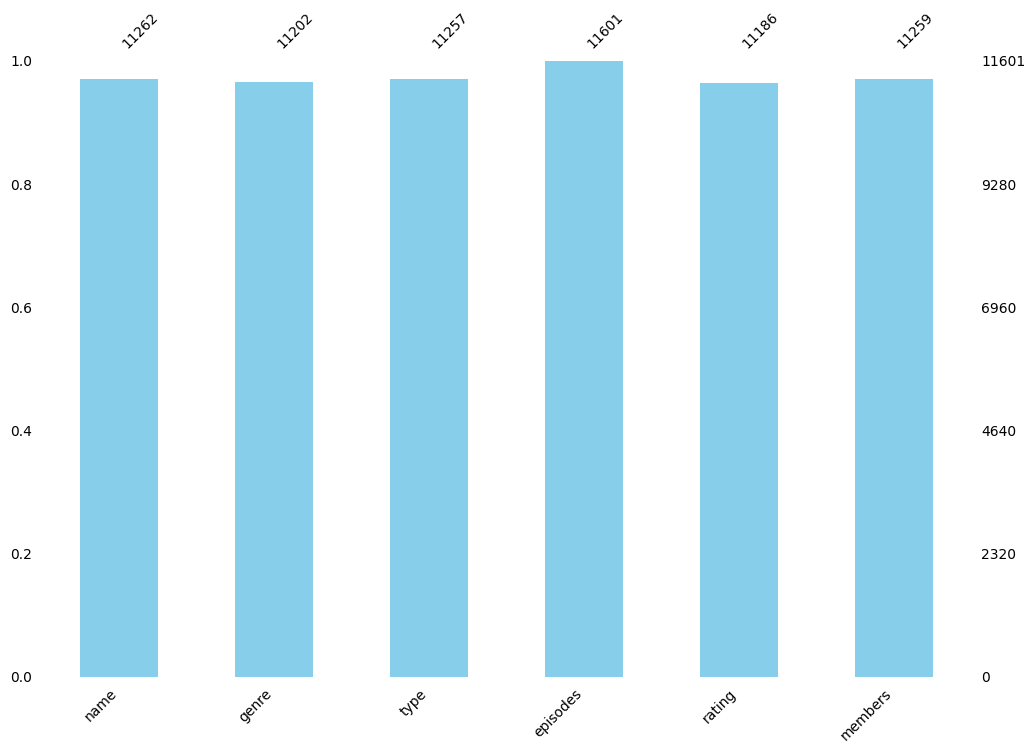

In [19]:
import matplotlib.pyplot as plt
import missingno as msno
msno.bar(df,
         figsize=(12,8),
         fontsize=10,
         color='skyblue')
plt.show()

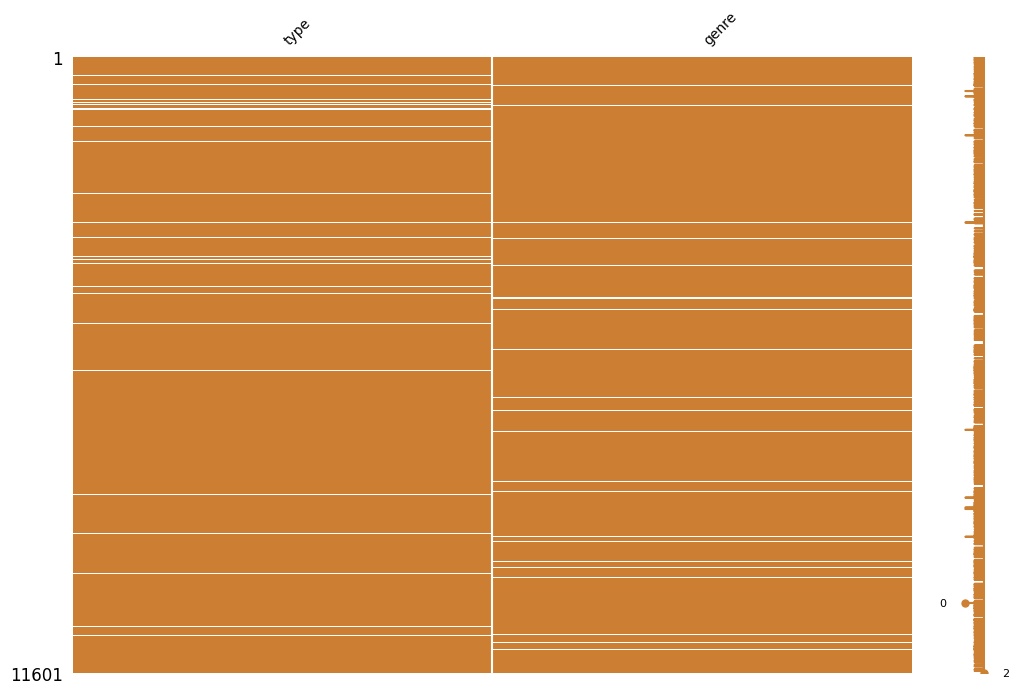

In [20]:
import matplotlib.pyplot as plt
import missingno as msno

msno.matrix(df=df[["type","genre"]],
            figsize=(12,8),
            fontsize=10,
            color=(0.8, 0.5, 0.2))
plt.show()


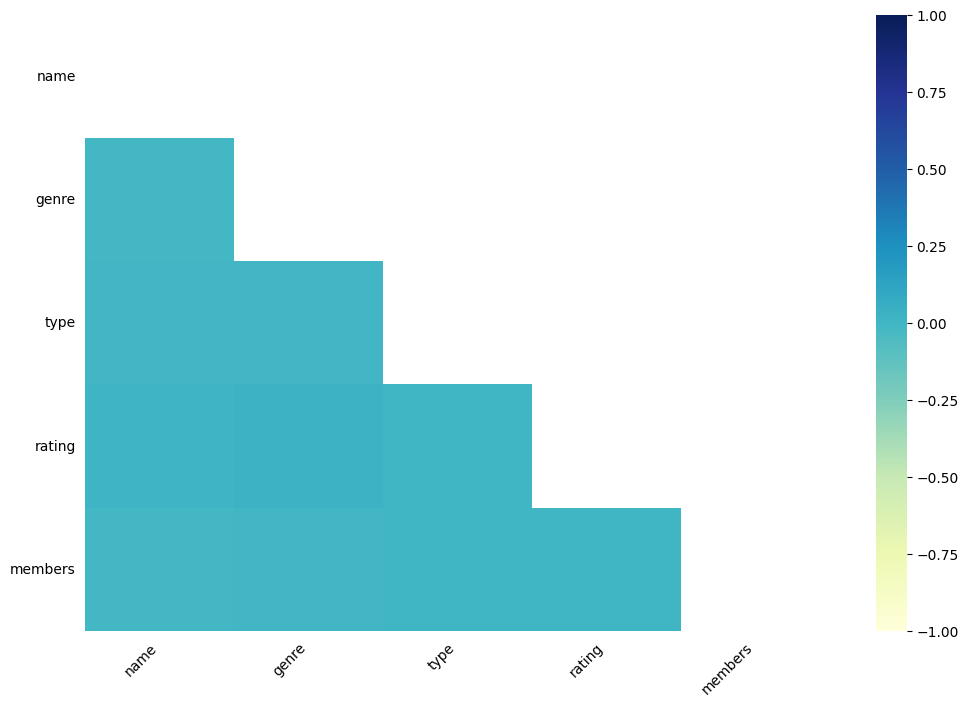

In [21]:
import matplotlib.pyplot as plt
msno.heatmap(df,
            figsize=(12,8),
            fontsize=10,
            cmap="YlGnBu")
plt.show()

In [22]:
df_fillna = df.copy()

df_fillna.head(3)

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630.0
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665.0
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262.0


In [23]:
df_fillna.isnull().sum()

,0
name,339
genre,399
type,344
episodes,0
rating,415
members,342


##Imputing Missing Values

In [24]:
df_fillna["name"] = df_fillna["name"].fillna("Unknown")

In [25]:
num_col_new=[]
cat_col_new=[]
for col in df_fillna.columns:
    if (df_fillna[col].dtype=="object" or df_fillna[col].dtype=="categorical"):
        cat_col_new.append(col)
    else:
        num_col_new.append(col)

In [26]:
for col in num_col_new:
    df_fillna[col]=df_fillna[col].fillna(df[col].mean())

In [27]:
cat_col_without_name = [col for col in cat_col_new if col != "name"]
for col in cat_col_without_name:
    df_fillna[col]=df_fillna[col].fillna(df[col].mode()[0])

In [28]:
df_fillna.isnull().sum()

,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [29]:
num_col_new

['episodes', 'rating', 'members']

##Data Visualization

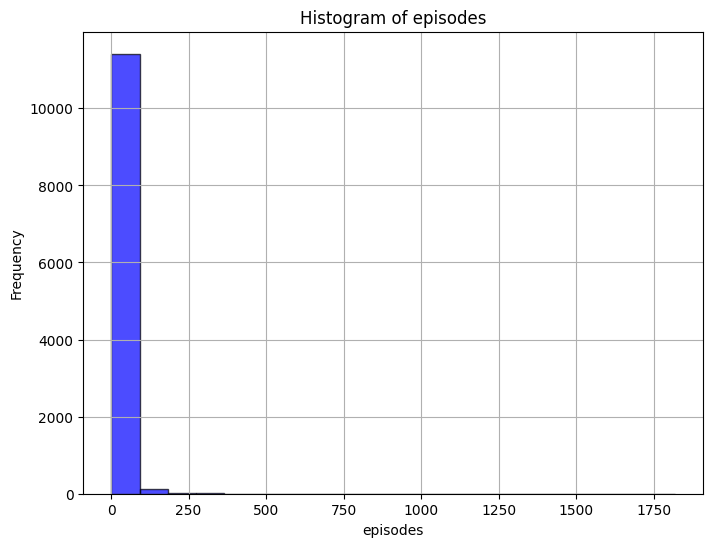

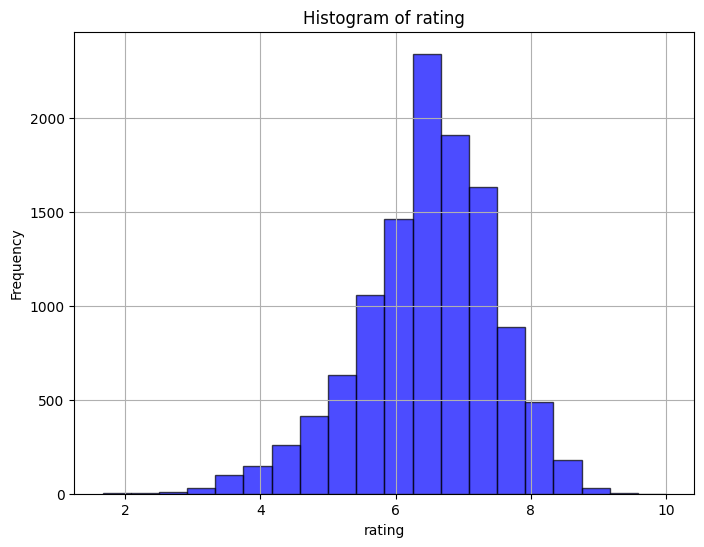

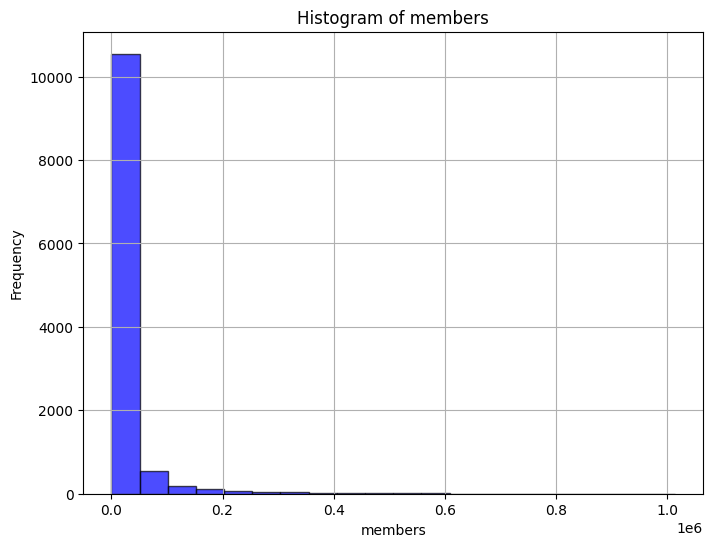

In [30]:
for col in num_col_new:
    plt.figure(figsize=(8, 6))
    plt.hist(x=df_fillna[col].dropna(), bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [31]:
df_=df_fillna.copy()

In [32]:
df_categorical=df_.select_dtypes(include="object")
df_categorical

,name,genre,type
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,Steins;Gate,"Sci-Fi, Thriller",TV
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV
...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA
12290,Under World,Hentai,OVA
12291,Violence Gekiga David no Hoshi,Hentai,OVA
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA


In [33]:
df_categorical["name"].unique().tolist()

['Kimi no Na wa.',
 'Fullmetal Alchemist: Brotherhood',
 'Gintama°',
 'Steins;Gate',
 'Gintama&#039;',
 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou',
 'Hunter x Hunter (2011)',
 'Ginga Eiyuu Densetsu',
 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare',
 'Gintama&#039;: Enchousen',
 'Clannad: After Story',
 'Koe no Katachi',
 'Gintama',
 'Code Geass: Hangyaku no Lelouch R2',
 'Haikyuu!! Second Season',
 'Sen to Chihiro no Kamikakushi',
 'Shigatsu wa Kimi no Uso',
 'Unknown',
 'Ookami Kodomo no Ame to Yuki',
 'Code Geass: Hangyaku no Lelouch',
 'Hajime no Ippo',
 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen',
 'Cowboy Bebop',
 'One Punch Man',
 'Mononoke Hime',
 'Monogatari Series: Second Season',
 'Mushishi',
 'Tengen Toppa Gurren Lagann',
 'Great Teacher Onizuka',
 'Natsume Yuujinchou Go',
 'Hajime no Ippo: New Challenger',
 'Mushishi Zoku Shou: Suzu no Shizuku',
 'Natsume Yuujinchou Shi',
 'Howl no Ugoku Shiro',
 'Fate/Zero 2nd Season',
 'Kizumonogatari I

In [34]:
for col in df_categorical.columns:
   print(f"There are {df_categorical[col].nunique()} unique values in {col}.\n")

There are 11261 unique values in name.

There are 3119 unique values in genre.

There are 6 unique values in type.



In [35]:
for col in df_categorical.columns:
    print(f"{df_categorical.value_counts()} \n",9*"********")

name                             genre                          type 
Unknown                          Hentai                         OVA      19
                                 Comedy                         TV        9
                                 Dementia                       Movie     6
                                 Fantasy                        Movie     5
                                 Comedy                         ONA       4
                                                                         ..
Hone Hone Rock                   Kids, Music                    Music     1
Honey Honey no Suteki na Bouken  Adventure, Historical, Shoujo  TV        1
Honey Tokyo                      Sci-Fi                         ONA       1
Hong Gil Dong 2084               Action, Adventure              Movie     1
◯                                Dementia, Music                ONA       1
Name: count, Length: 11532, dtype: int64 
 ***************************************************

In [36]:
df_members_episode=df_.groupby(by=["episodes","members"])["rating"].mean().to_frame().reset_index().sort_values(by="rating",ascending=False)[:10]
df_members_episode

,episodes,members,rating
2857,1.0,200630.0,9.37
8359,64.0,793665.0,9.26
8125,51.0,114262.0,9.25
6930,24.0,673572.0,9.17
8127,51.0,151266.0,9.16
5164,10.0,93351.0,9.15
8543,148.0,425855.0,9.13
6445,13.0,81109.0,9.11
8505,110.0,80679.0,9.11
2759,1.0,72534.0,9.10


<ipython-input-37-215b25a23d3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_category,x="name",y="rating",palette="viridis")


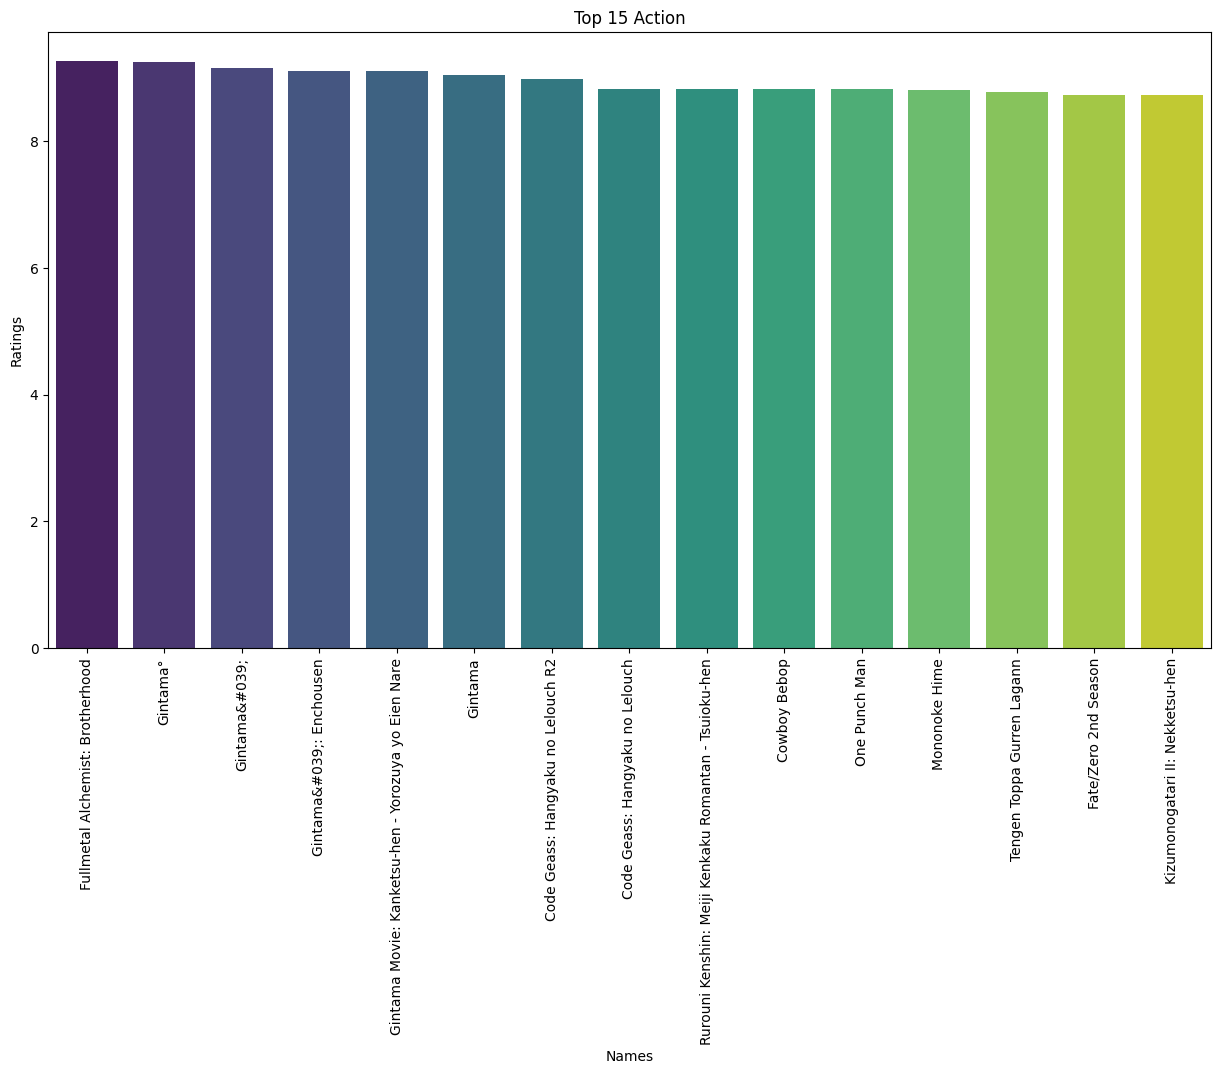

<ipython-input-37-215b25a23d3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_category,x="name",y="rating",palette="viridis")


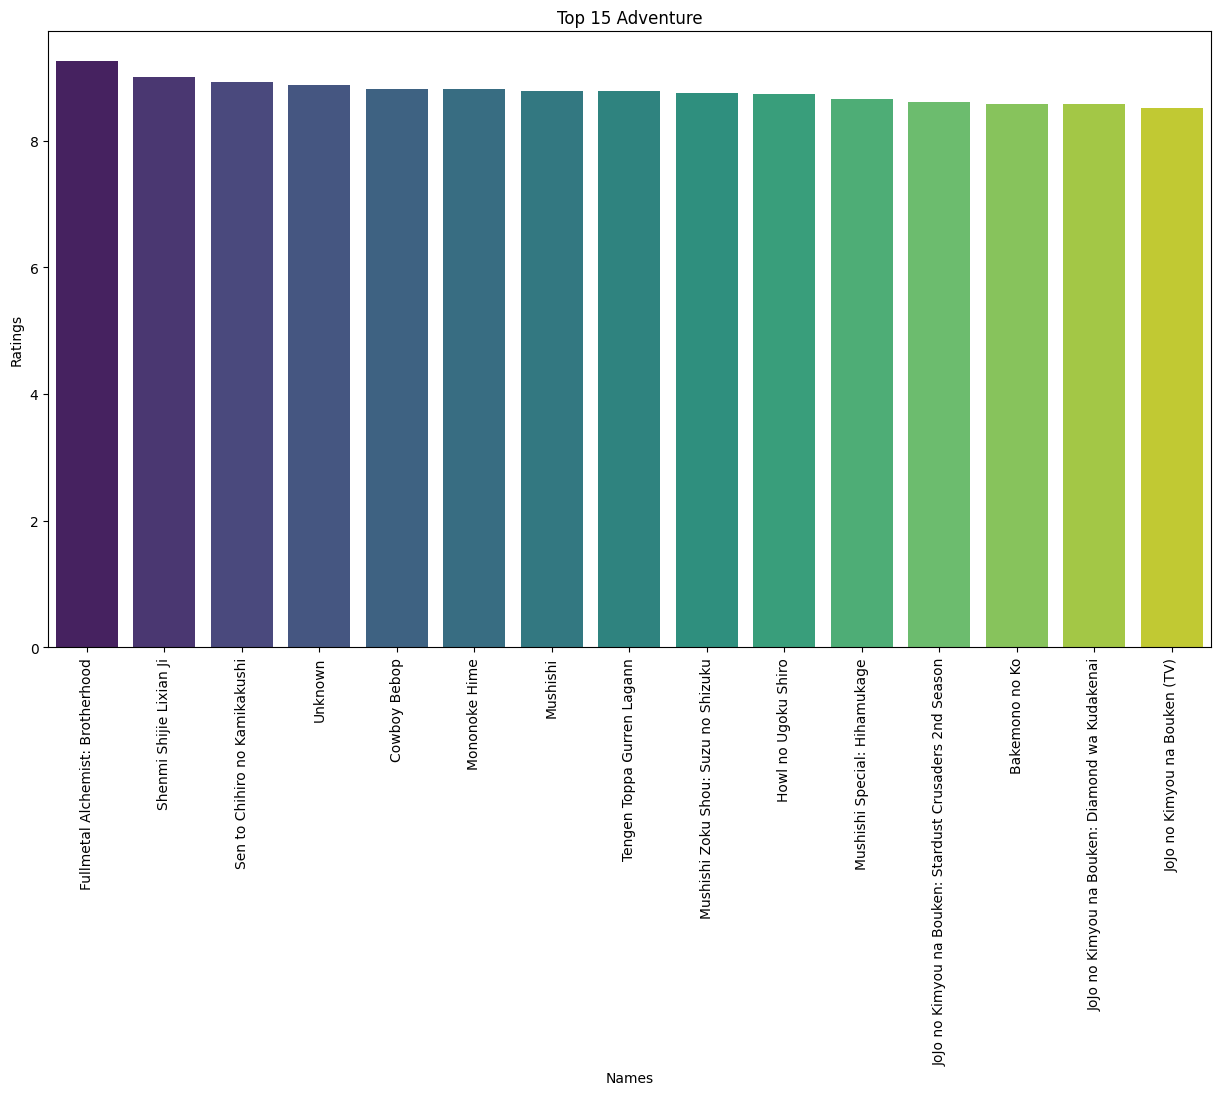

<ipython-input-37-215b25a23d3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_category,x="name",y="rating",palette="viridis")


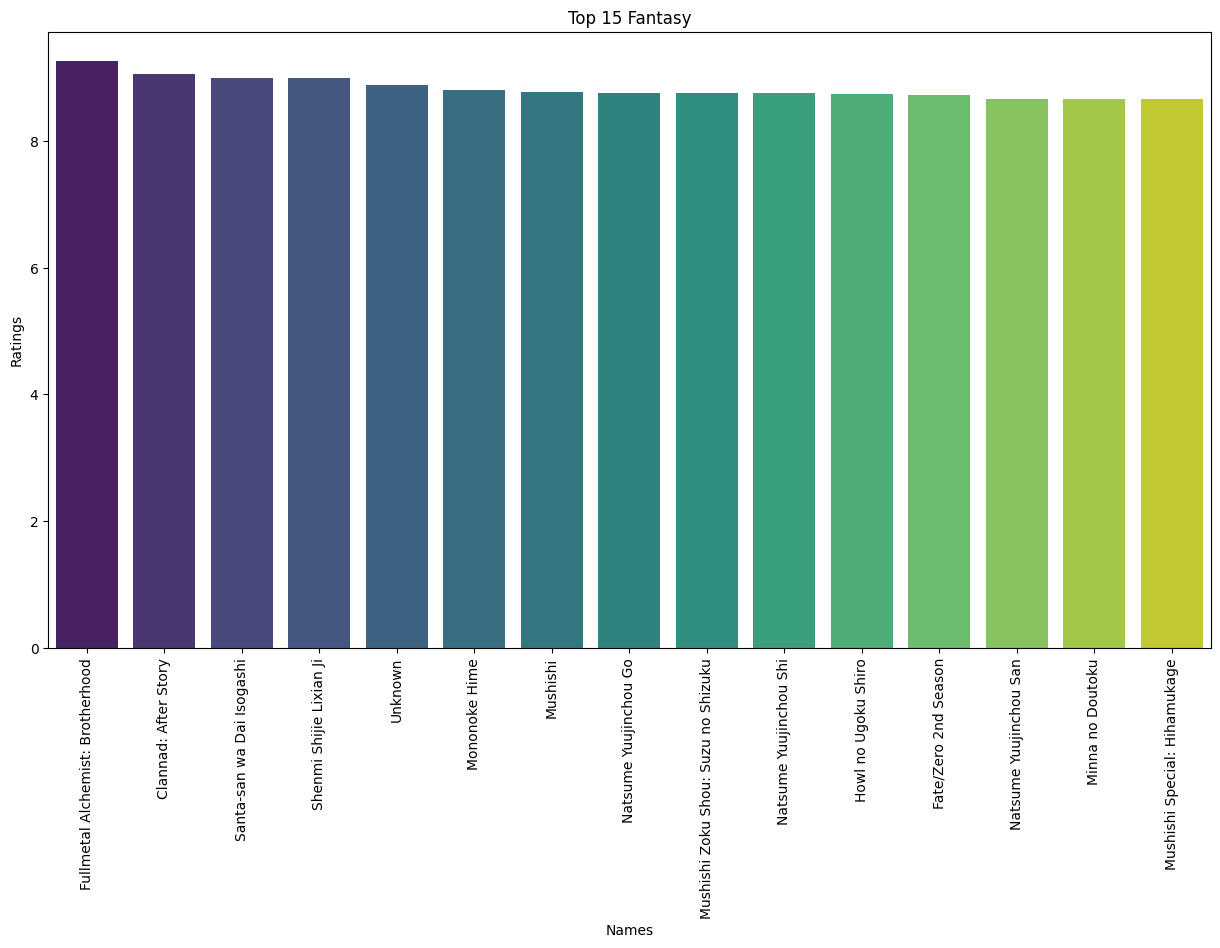

<ipython-input-37-215b25a23d3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_category,x="name",y="rating",palette="viridis")


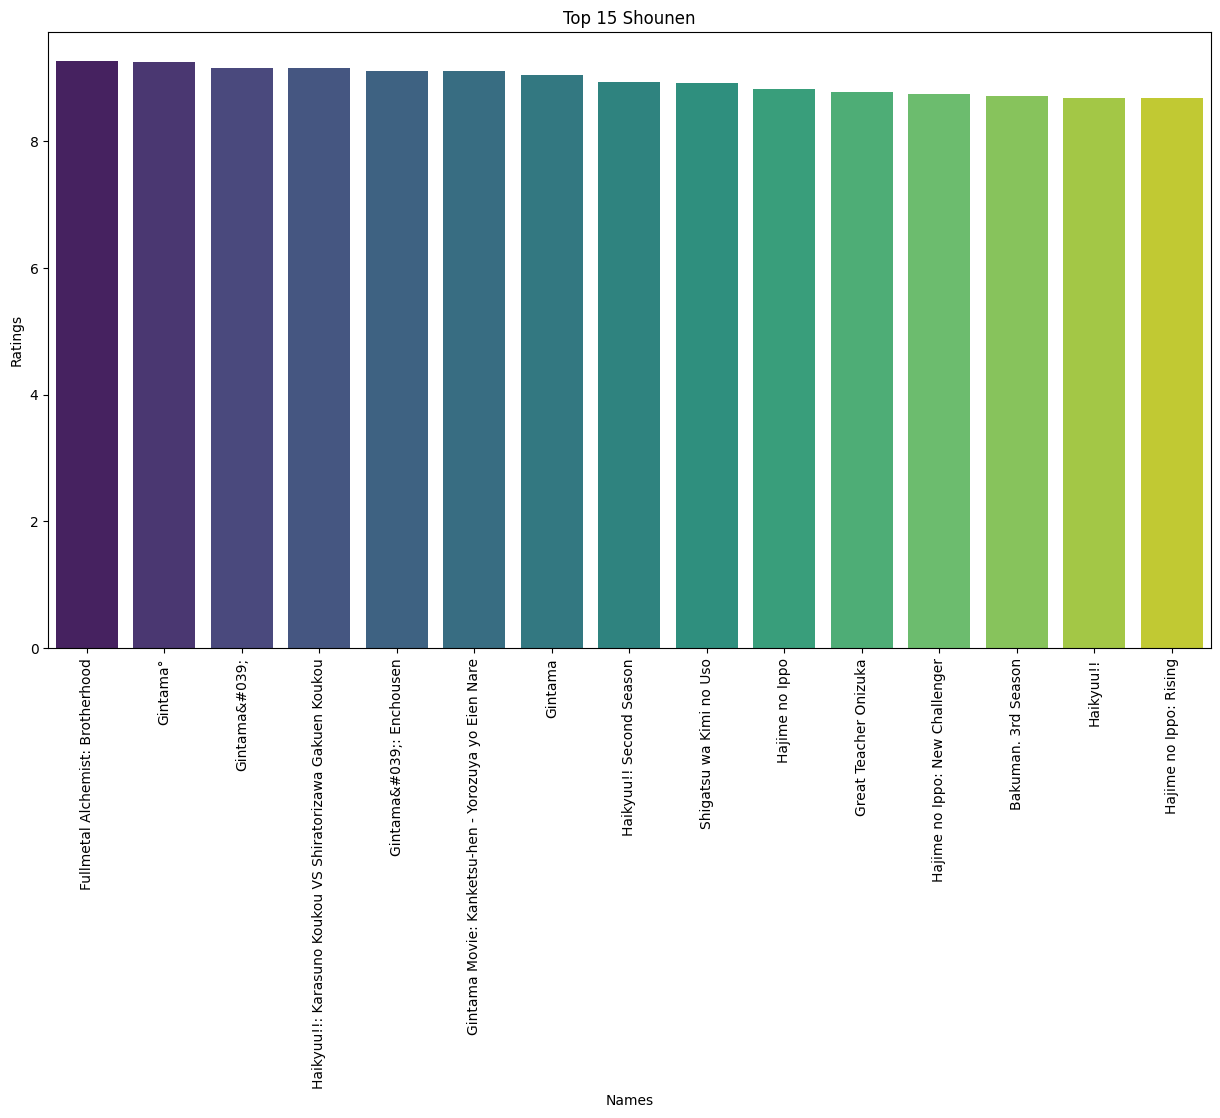

<ipython-input-37-215b25a23d3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_category,x="name",y="rating",palette="viridis")


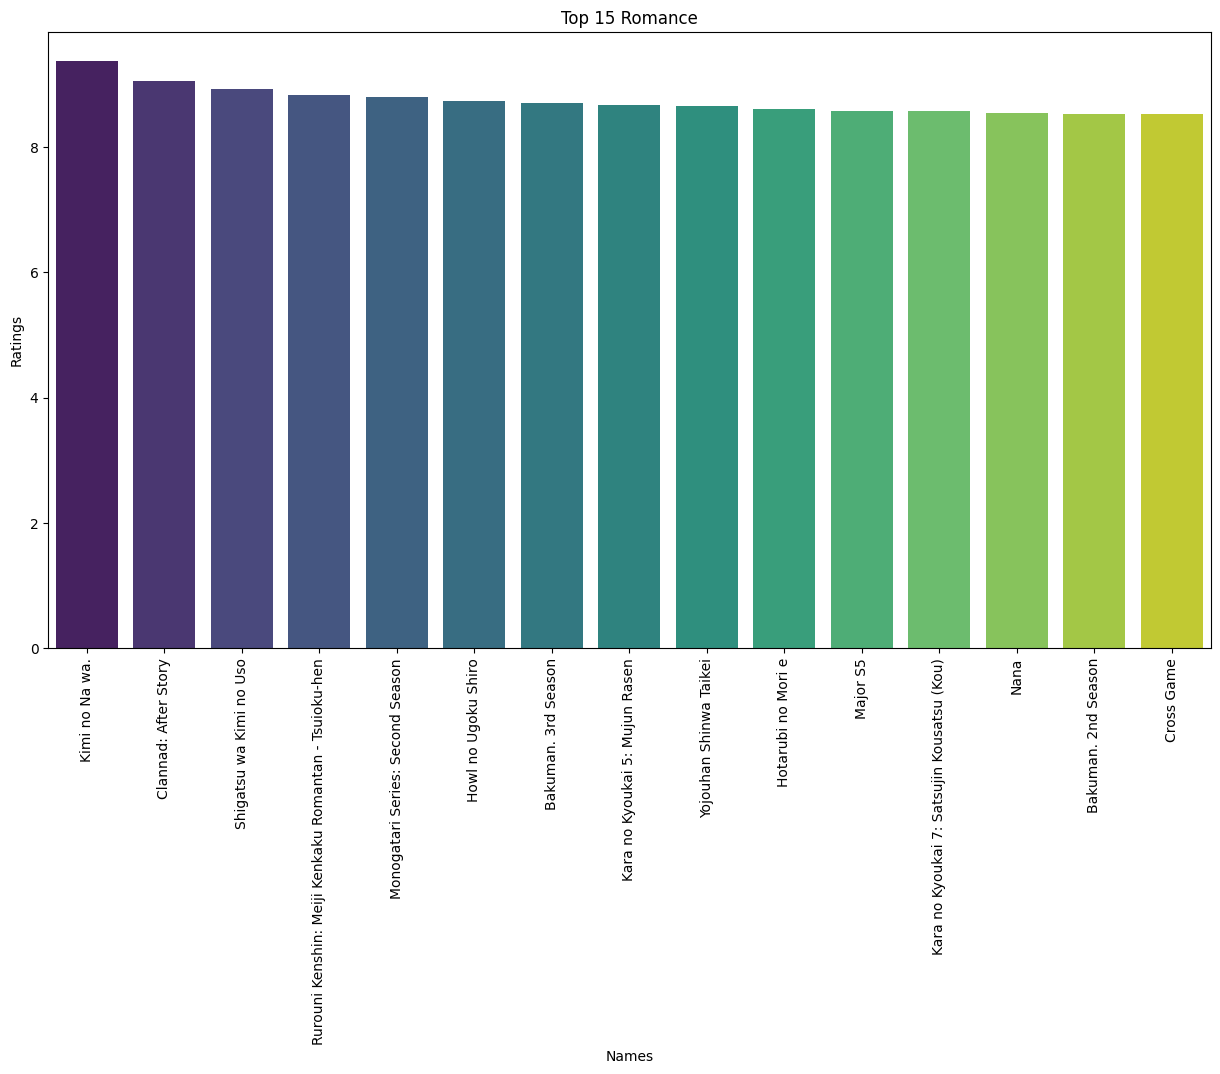

<ipython-input-37-215b25a23d3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_category,x="name",y="rating",palette="viridis")


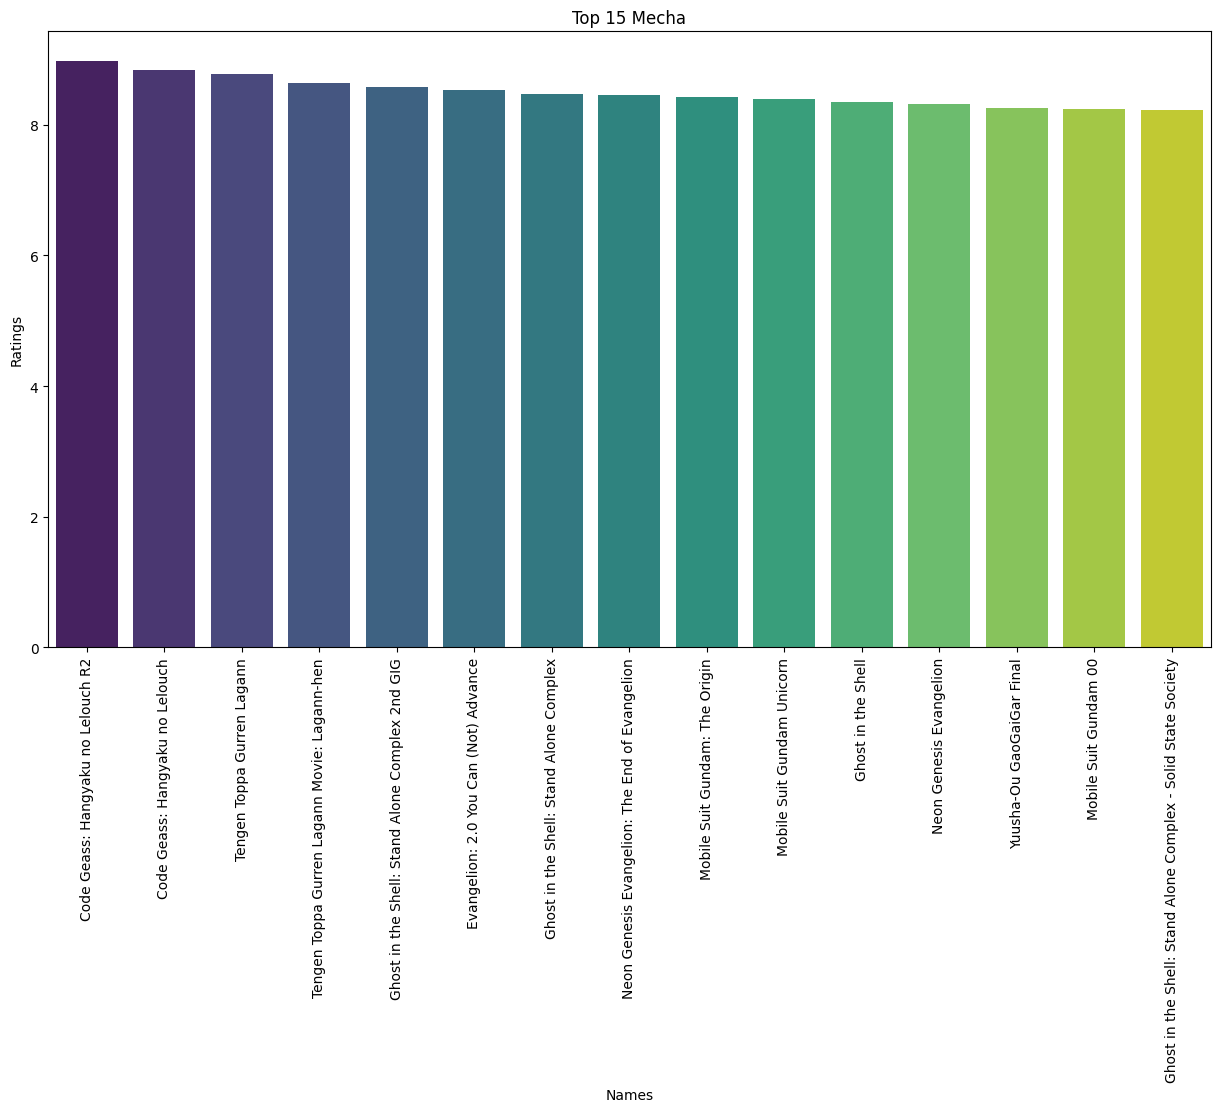

In [37]:
categories=["Action","Adventure","Fantasy","Shounen","Romance","Mecha"]

for category in categories:
    categories_df=df_[df_["genre"].str.contains(category)]
    top_15_category=categories_df.nlargest(15,"rating")

    plt.figure(figsize=(15,8))
    sns.barplot(data=top_15_category,x="name",y="rating",palette="viridis")
    plt.xlabel("Names")
    plt.ylabel("Ratings")
    plt.title(f"Top 15 {category}")
    plt.xticks(rotation=90)
    plt.show()

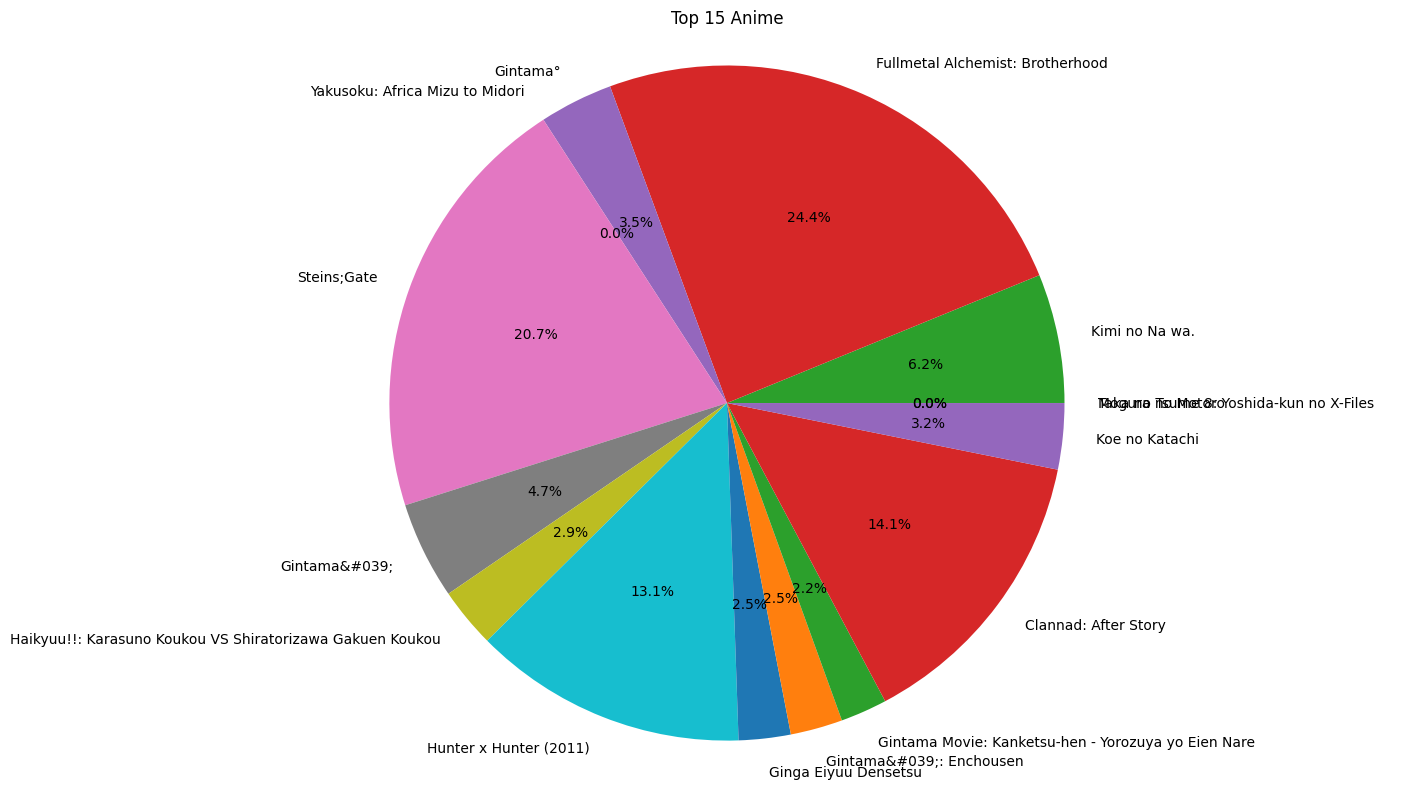

In [38]:
top_15_anime=df_.nlargest(15,"rating")

labels=top_15_anime["name"]
voted=top_15_anime["members"]

plt.figure(figsize=(15,8))
plt.pie(voted,labels=labels,autopct='%1.1f%%')
plt.title("Top 15 Anime")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [39]:
df_['rating_category'] = pd.cut(df_['rating'], bins=[0, 5, 8, 10]  , labels=['Skip', 'Watchable', 'Masterpiece'], include_lowest=True)

print(df_fillna["rating"].value_counts())

rating
6.480888    415
6.000000    124
7.000000     89
6.500000     85
6.250000     77
           ... 
3.470000      1
3.710000      1
3.910000      1
4.190000      1
3.140000      1
Name: count, Length: 591, dtype: int64


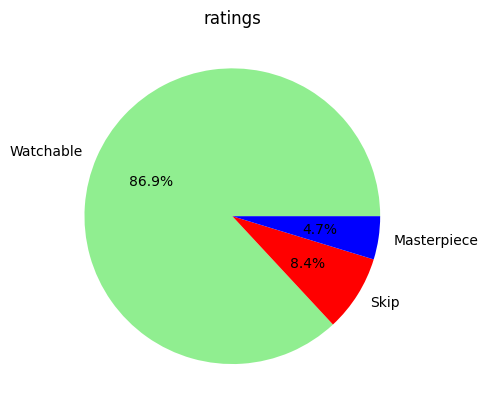

In [40]:
df_["rating_category"].value_counts().plot.pie(autopct='%1.1f%%',colors=["lightgreen","red","blue","yellow"])
plt.title("ratings")
plt.ylabel("")
plt.show()

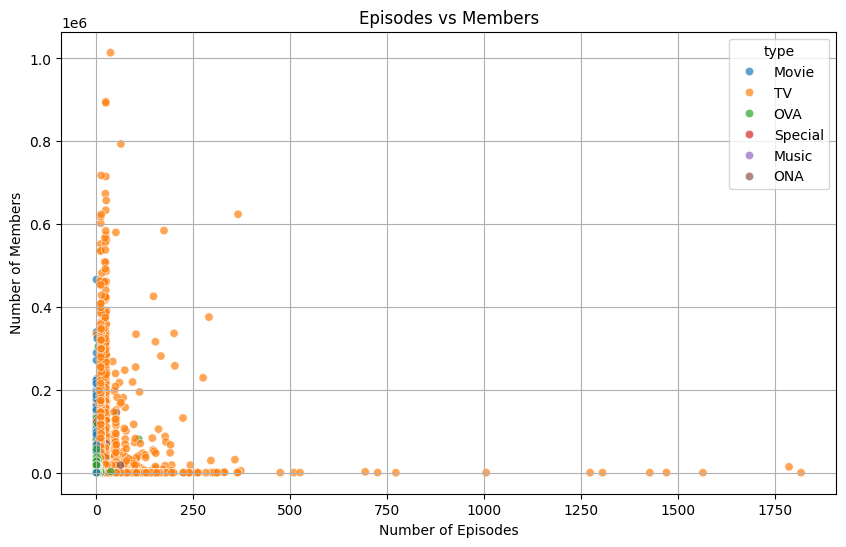

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fillna, x="episodes", y="members", hue="type", alpha=0.7, palette="tab10")
plt.title("Episodes vs Members")
plt.xlabel("Number of Episodes")
plt.ylabel("Number of Members")
plt.grid(True)
plt.show()

<ipython-input-42-a759bdbe7a13>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x="genre", y="episodes", scale="width", palette="muted")
<ipython-input-42-a759bdbe7a13>:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=filtered_df, x="genre", y="episodes", scale="width", palette="muted")


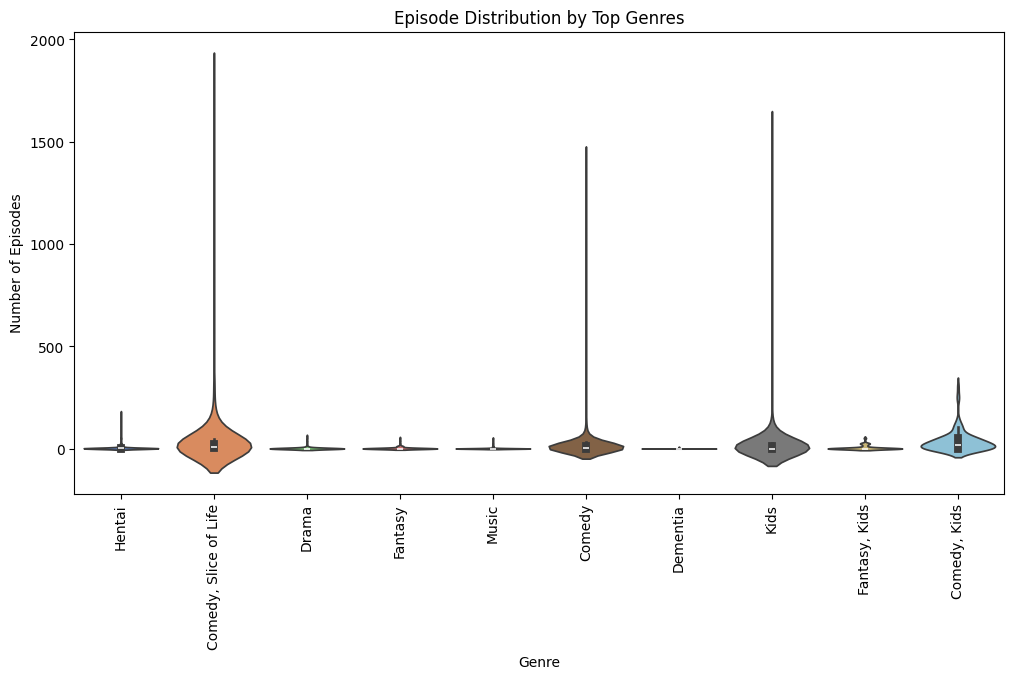

In [42]:
top_genres = df_fillna["genre"].value_counts().head(10).index
top_types=df_fillna["type"].value_counts().head(10).index
filtered_df = df_[df_["genre"].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x="genre", y="episodes", scale="width", palette="muted")
plt.xticks(rotation=90)
plt.title("Episode Distribution by Top Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Episodes")
plt.show()

##Data Simplification and Encoding

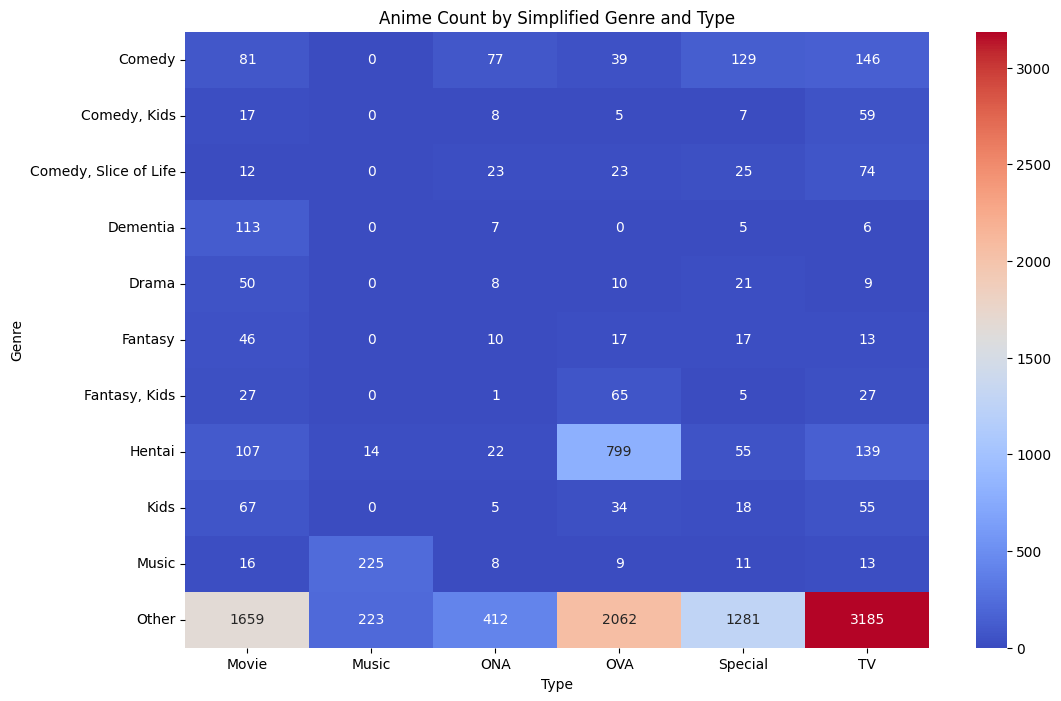

In [43]:
df_["genre_grouped"] = df_fillna["genre"].apply(lambda x: x if x in top_genres else "Other")
df_["type_grouped"] = df_fillna["type"].apply(lambda x: x if x in top_types else "Other")

grouped_count = df_.groupby(["genre_grouped", "type_grouped"]).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(grouped_count, annot=True, fmt="d", cmap="coolwarm")
plt.title("Anime Count by Simplified Genre and Type")
plt.xlabel("Type")
plt.ylabel("Genre")
plt.show()

In [44]:
le=LabelEncoder()
df_["encoded_genre"]=le.fit_transform(df_["genre"])
df_["encoded_type"]=le.fit_transform(df_["type"])

##Model Building and Evaluation

In [45]:
x=df_[["encoded_type","encoded_genre","episodes","members"]]
y=df_["rating_category"]

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=81)
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
model.score(x_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8539422662645412

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on the test data using the trained model
y_pred = model.predict(x_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7655698747406154
Recall: 0.8539422662645412
F1-score: 0.7981450874316053


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=500)

cv_scores = cross_val_score(model, x, y, cv=5)

print("Cross-Validation Scores: ", cv_scores)
print("Mean Score: ", np.mean(cv_scores))
print("Standard Deviation: ", np.std(cv_scores))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores:  [0.78112882 0.87715517 0.87284483 0.8737069  0.87155172]
Mean Score:  0.8552774888945015
Standard Deviation:  0.03712078329473524


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Interview Questions:
1. Can you explain the difference between user-based and item-based collaborative filtering?
**Answer**
* *User-Based:* Finds users with similar tastes and recommends what those similar users liked. (e.g., "People like you also liked...")
* *Item-Based:* Finds items (anime) similar to what a user likes and recommends them. (e.g., "Since you liked Naruto, you might like Bleach.")


2. What is collaborative filtering, and how does it work?
**Answer**
* It’s a recommendation technique that suggests items based on user behavior. It works by finding patterns in what users watch, rate, or interact with and making suggestions based on similar users or items.